# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [722]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [723]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [724]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [725]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [726]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-04T13:01:29+0300',
 'created_at': '2023-03-04T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


 Сколько всего найдено вакансий

In [727]:
data['found']

256

Количество страниц в результатах поиска

In [728]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [729]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-04T13:01:29+0300,2023-03-04T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-04T15:02:29+0300,2023-03-04T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77075807,False,Data Scientist,NaN,False,False,None,None,2023-03-03T13:58:00+0300,2023-03-03T13:58:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7172-7172-it,"Лента, федеральная розничная сеть, IT",NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [730]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [731]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [732]:
import time
from time import sleep
URL = 'https://api.hh.ru/vacancies'

data = pd.DataFrame()

for i in range(20):
    params = {
        'text': "Data scientist OR data Scientist Аналитик данных OR data analyst OR Computer Scientist OR computer scientist OR Data Analyst OR IT Analyst OR аналитик контента OR BI-аналитик OR Дата-аналитик OR Аналитик OR Менеджер проектов OR Бизнес-аналитик OR Аналитик Excel OR Системный аналитик OR Аналитик SQL OR Аналитик data OR дата-аналитик",
        'area': 1,
        'page': i,
        'per_page': 100
    }

    time.sleep(0.5)
    req = requests.get(URL, params=params)
    df = json.loads(req.content.decode())
    df = pd.DataFrame(df)
    if len(df.columns) != 8: # некоторые вакансии имеют отличный от эталона формат, но их мало -- пропущу для облегчения задачи
        continue
    data = pd.concat([data, df], axis=0, join='outer')

Почему именно 550 страниц? Попробовал сначала 1000, подождал, вышло 54 791 вакансий -- значит, в ближайшее время достаточно просматривать 550 страниц ('per_page': 100).

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [733]:
data
df = pd.json_normalize(data['items']).drop_duplicates(subset='id')
df

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,address,salary.from,salary.to,salary.currency,salary.gross,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,NaN,None,None,2023-03-04T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77216003,False,BI Analyst,NaN,False,False,NaN,None,None,2023-03-04T13:33:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77135735,False,Системный аналитик,NaN,False,False,NaN,None,None,2023-03-04T14:48:25+0300,...,NaN,108000.0,395000.0,RUR,True,NaN,NaN,NaN,NaN,NaN
3,75731291,False,Аналитик SQL,NaN,False,False,NaN,None,None,2023-03-04T14:25:37+0300,...,NaN,NaN,NaN,NaN,NaN,bil-4934-it,"билайн: ИТ, Data, Digital",NaN,NaN,NaN
4,76536709,False,Data Scientist (LTV),NaN,False,False,NaN,None,None,2023-03-04T11:32:26+0300,...,NaN,NaN,NaN,NaN,NaN,bil-4934-it,"билайн: ИТ, Data, Digital",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,77413542,False,Аналитик в Маркет для бизнеса,NaN,False,False,NaN,None,None,2023-03-02T10:28:32+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,76274433,False,Data Scientist Senior (Моделирование RnD),NaN,False,False,NaN,None,None,2023-02-21T14:09:23+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,76957704,False,Senior интернет-маркетолог/Менеджер Digital пр...,NaN,False,True,NaN,None,None,2023-03-04T10:41:31+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,76607516,False,Маркетолог-аналитик по работе с маркетплейсом ...,NaN,False,False,NaN,None,None,2023-03-02T17:16:41+0300,...,NaN,50000.0,300000.0,RUR,False,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [734]:
df = df.drop(['response_letter_required', 'address', 'sort_point_distance', 'published_at', 'created_at', 'insider_interview', 'url', 'adv_response_url', 'alternate_url', 'relations', 'contacts', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'accept_incomplete_resumes', 'area.id', 'area.name', 'area.url', 'employer.alternate_url', 'employer.logo_urls', 'employer.logo_urls.90', 'employer.logo_urls.240', 'employer.logo_urls.original', 'employer.vacancies_url', 'address.city', 'address.description', 'address.building', 'address.lat', 'address.lng', 'address.metro.lat', 'address.metro.line_id', 'address.raw', 'employer.logo_urls', 'insider_interview.id', 'insider_interview.url', 'address.metro.line_id', 'address.metro.lng', 'address.metro.lat', 'address.metro.line_name', 'address.id', 'insider_interview', 'url', 'adv_response_url', 'alternate_url', 'relations', 'address.metro', 'address.metro.station_id', 'address.metro_stations', 'address.street', 'type.id'], axis=1) # бесполезные для анализа колонки
df = df.rename(columns={'name': 'profession'}) # по-моему так называть логичнее
df = df[df['archived']==False].drop('archived', axis=1) # архивированные вакансии -- ни к чему
df.to_excel("Список_вакансий.xlsx")
df

,id,premium,profession,department,has_test,salary,response_url,apply_alternate_url,professional_roles,type.name,...,snippet.responsibility,schedule.id,schedule.name,address.metro.station_name,salary.from,salary.to,salary.currency,salary.gross,department.id,department.name
0,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '10', 'name': 'Аналитик'}]",Открытая,...,...в <highlighttext>данных</highlighttext> с п...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77216003,False,BI Analyst,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",Открытая,...,"Processing reports, updating <highlighttext>da...",fullDay,Полный день,Улица 1905 года,NaN,NaN,NaN,NaN,NaN,NaN
2,77135735,False,Системный аналитик,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '10', 'name': 'Аналитик'}]",Открытая,...,"Написание ТЗ на разработку, интеграцию систем,...",remote,Удаленная работа,NaN,108000.0,395000.0,RUR,True,NaN,NaN
3,75731291,False,Аналитик SQL,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '10', 'name': 'Аналитик'}]",Открытая,...,Анализ существующих процессов Блока по развити...,remote,Удаленная работа,NaN,NaN,NaN,NaN,NaN,bil-4934-it,"билайн: ИТ, Data, Digital"
4,76536709,False,Data Scientist (LTV),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '10', 'name': 'Аналитик'}]",Открытая,...,Продуктовая команда департамента клиентской <h...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,bil-4934-it,"билайн: ИТ, Data, Digital"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,77413542,False,Аналитик в Маркет для бизнеса,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",Открытая,...,Оптимизировать работу сервиса с позиции <highl...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,76274433,False,Data Scientist Senior (Моделирование RnD),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '96', 'name': 'Программист, разработчи...",Открытая,...,Работать с данными для обучения моделей (текст...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,76957704,False,Senior интернет-маркетолог/Менеджер Digital пр...,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '68', 'name': 'Менеджер по маркетингу,...",Открытая,...,Считать медиапланы и рассчитывать unit-экономи...,fullDay,Полный день,Бауманская,NaN,NaN,NaN,NaN,NaN,NaN
1998,76607516,False,Маркетолог-аналитик по работе с маркетплейсом ...,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '163', 'name': 'Маркетолог-аналитик'}]",Открытая,...,Ежедневный анализ продаж (наших и конкурентов)...,remote,Удаленная работа,Деловой центр,50000.0,300000.0,RUR,False,NaN,NaN


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [735]:
len(df.index)

1996

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Сделаю табличку самых частых слов и оттуда выберу характеристики навыков. Посчитаю их количества и сделаю pieplot на основе полученных данных.

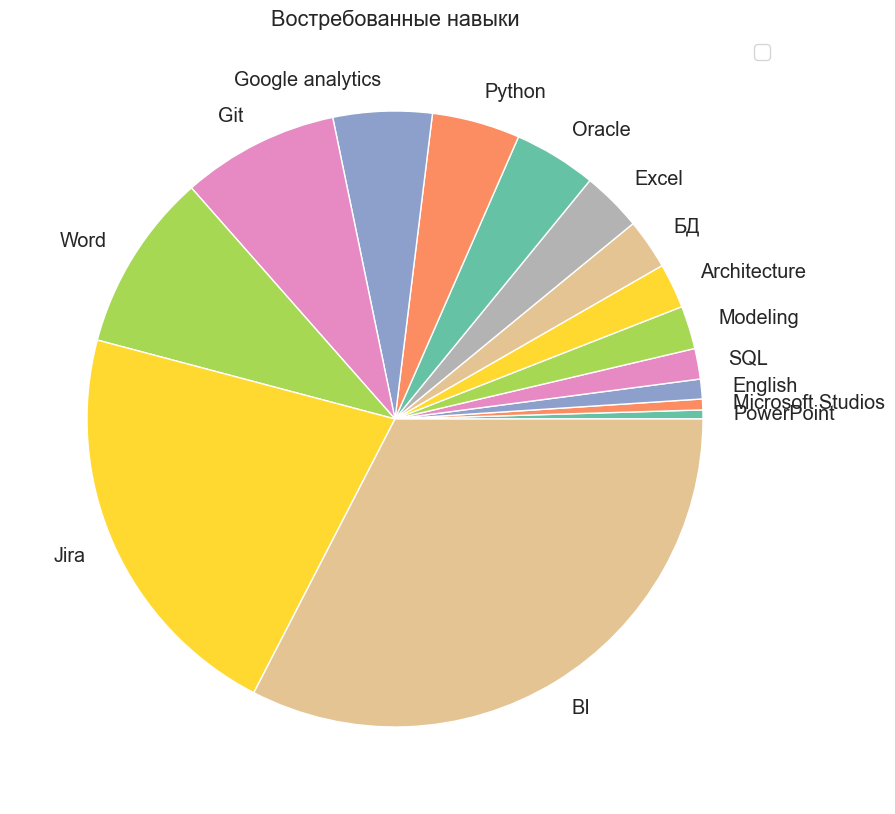

In [736]:
#df.columns
#df['snippet.requirement']
words = pd.DataFrame(" ".join(df['snippet.requirement'].astype(str)).split(' ')).value_counts()
words.rename("quantity").rename_axis('word').reset_index()
# top-15: SQL, Excel, Python, Word, Jira, PowerPoint, MS, Google Analytics, Git, моделировани, архитектур, BI, Англ, БД, Oracle

requirement = df.dropna(subset=['snippet.requirement'])
sql = len(requirement[requirement['snippet.requirement'].str.contains('SQL')].index)
excel = len(requirement[requirement['snippet.requirement'].str.contains('Excel')].index)
python = len(requirement[requirement['snippet.requirement'].str.contains('Python')].index)
word = len(requirement[requirement['snippet.requirement'].str.contains('Word')].index)
jira = len(requirement[requirement['snippet.requirement'].str.contains('Jira')].index)
powp = len(requirement[requirement['snippet.requirement'].str.contains('PowerPoint')].index)
ms = len(requirement[requirement['snippet.requirement'].str.contains('MS')].index)
goog = len(requirement[requirement['snippet.requirement'].str.contains('Google Analytics')].index)
git = len(requirement[requirement['snippet.requirement'].str.contains('Git')].index)
mod = len(requirement[requirement['snippet.requirement'].str.contains('моделировани')].index)
arch = len(requirement[requirement['snippet.requirement'].str.contains('архитектур')].index)
bi = len(requirement[requirement['snippet.requirement'].str.contains('BI')].index)
eng = len(requirement[requirement['snippet.requirement'].str.contains('Англ')].index)
bd = len(requirement[requirement['snippet.requirement'].str.contains('БД')].index)
oracle = len(requirement[requirement['snippet.requirement'].str.contains('Oracle')].index)
stat = pd.DataFrame({sql, excel, python, word, jira, powp, ms, goog, git, mod, arch, bi, eng, bd, oracle})
stat = stat.rename(index={0: 'SQL', 1: 'Excel', 2: 'Python', 3: 'Word', 4: 'Jira', 5: 'PowerPoint', 6: 'Microsoft Studios', 7: 'Google analytics', 8: 'Git', 9: 'Modeling', 10: 'Architecture', 11: 'BI', 12: 'English', 13: 'БД', 14: 'Oracle'}, columns={0: 'quantity'})
stat = stat.sort_values(by=['quantity'], ascending=True)

stat.plot.pie(y='quantity', figsize=(10, 10))
plt.title('Востребованные навыки')
plt.ylabel('')
plt.legend('')
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Text(0, 0.5, 'количество объявлений')

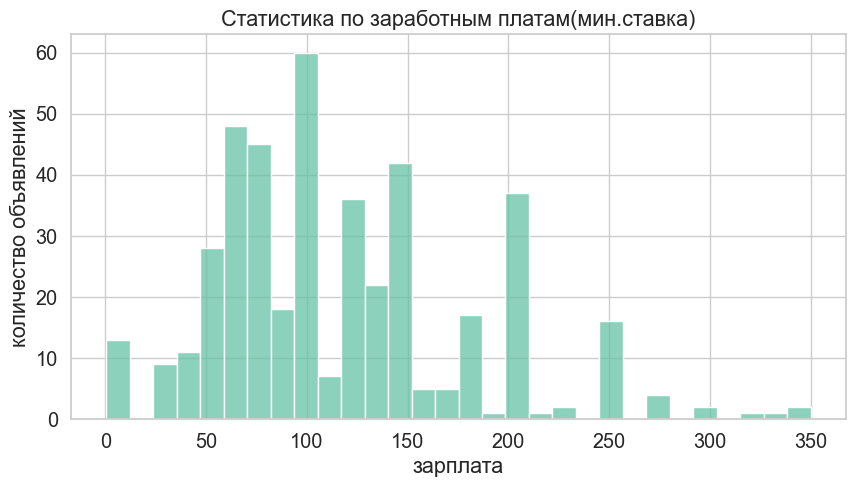

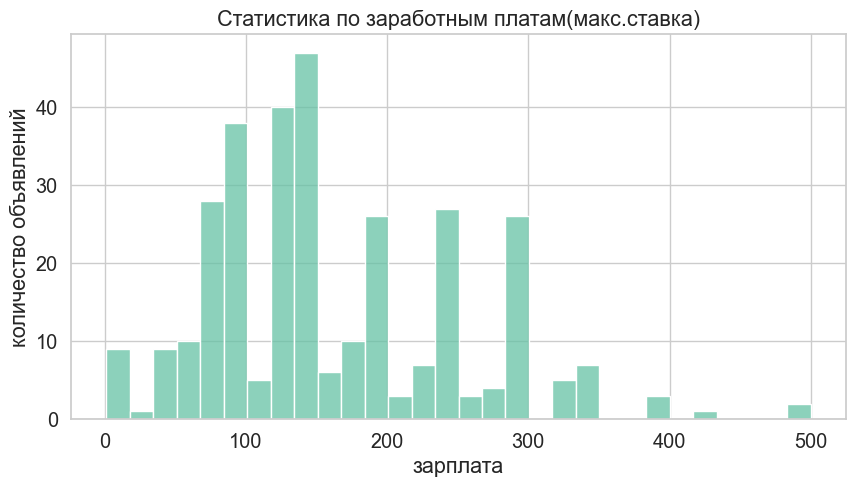

In [737]:
#df.columns
#df['salary.currency'].drop_duplicates()
def exchange(x):
    return x * 75.57 # текущий курс


df[df['salary.currency'] == 'USD']['salary.from'].apply(exchange)
df[df['salary.currency'] == 'USD']['salary.to'].apply(exchange)

_from = (df['salary.from'].dropna()).astype(float)/1000
_to = (df['salary.to'].dropna()).astype(float)/1000

plt.figure(figsize=(10, 5))
sns.histplot(data=_from, bins=30)
plt.title('Статистика по заработным платам(мин.ставка)')
plt.xlabel('зарплата')
plt.ylabel('количество объявлений')


plt.figure(figsize=(10, 5))
sns.histplot(data=_to, bins=30)
plt.title('Статистика по заработным платам(макс.ставка)')
plt.xlabel('зарплата')
plt.ylabel('количество объявлений')

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [738]:
import time
from time import sleep
URL = 'https://api.hh.ru/vacancies'

data = pd.DataFrame()

for i in range(6):
    params = {
        'text': "Разработчик игр OR Гейм-дизайнер OR Game OR Game Designer OR Game Analyst OR Аналитик игр", # не, ну а что? прикольно же
        'area': 1,
        'page': i,
        'per_page': 100
    }

    time.sleep(1.1)
    req = requests.get(URL, params=params)
    df = json.loads(req.content.decode())
    df = pd.DataFrame(df)
    if len(df.columns) != 8:
        continue
    data = pd.concat([data, df], axis=0, join='outer')

Опять же 6 страниц хватило - вакансий всего-то 533.

In [739]:
data
df = pd.json_normalize(data['items']).drop_duplicates(subset='id')
df = df.drop(['response_letter_required', 'address', 'sort_point_distance', 'published_at', 'created_at', 'insider_interview', 'url', 'adv_response_url', 'alternate_url', 'relations', 'contacts', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'accept_incomplete_resumes', 'area.id', 'area.name', 'area.url', 'employer.alternate_url', 'employer.logo_urls', 'employer.logo_urls.90', 'employer.logo_urls.240', 'employer.logo_urls.original', 'employer.vacancies_url', 'address.city', 'address.description', 'address.building', 'address.metro.lat', 'address.metro.line_id', 'address.raw', 'employer.logo_urls', 'insider_interview.id', 'insider_interview.url', 'address.metro.line_id', 'address.metro.lng', 'address.metro.lat', 'address.metro.line_name', 'address.id', 'insider_interview', 'url', 'adv_response_url', 'alternate_url', 'relations', 'address.metro', 'address.metro.station_id', 'address.metro_stations', 'type.id'], axis=1) # бесполезные для анализа колонки
df = df.rename(columns={'name': 'profession'}) # по-моему так называть логичнее
df = df[df['archived']==False].drop('archived', axis=1) # архивированные вакансии -- ни к чему
df.to_excel("Games.xlsx")
df

,id,premium,profession,department,has_test,salary,response_url,apply_alternate_url,professional_roles,type.name,...,salary.from,salary.to,salary.currency,salary.gross,address.street,address.lat,address.lng,address.metro.station_name,department.id,department.name
0,77217472,False,Game Designer Balance,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '25', 'name': 'Гейм-дизайнер'}]",Открытая,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75725251,False,Game Designer (Middle\Senior),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '34', 'name': 'Дизайнер, художник'}]",Открытая,...,100000.0,210000.0,RUR,False,NaN,NaN,NaN,NaN,NaN,NaN
2,77354452,False,Game designer — Hyper casual games (Limassol),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '25', 'name': 'Гейм-дизайнер'}]",Открытая,...,3000.0,4000.0,EUR,False,NaN,NaN,NaN,NaN,NaN,NaN
3,77085729,False,Game Designer,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '25', 'name': 'Гейм-дизайнер'}]",Открытая,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77486329,False,Lead Game Designer,NaN,True,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '25', 'name': 'Гейм-дизайнер'}]",Открытая,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,76835403,False,Customer Support Specialist (English),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '93', 'name': 'Переводчик'}]",Открытая,...,800.0,1000.0,USD,True,NaN,NaN,NaN,NaN,NaN,NaN
529,75630408,False,Head of Casino,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '107', 'name': 'Руководитель проектов'}]",Открытая,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,76597415,False,SEO-специалист,NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '68', 'name': 'Менеджер по маркетингу,...",Открытая,...,750.0,1300.0,USD,False,NaN,NaN,NaN,NaN,NaN,NaN
531,76878039,False,Nanny a 2.5-year old boy (Russian language),NaN,False,NaN,None,https://hh.ru/applicant/vacancy_response?vacan...,"[{'id': '23', 'name': 'Воспитатель, няня'}]",Открытая,...,126000.0,126000.0,RUR,False,NaN,NaN,NaN,NaN,NaN,NaN


In [740]:
len(df.index)

533

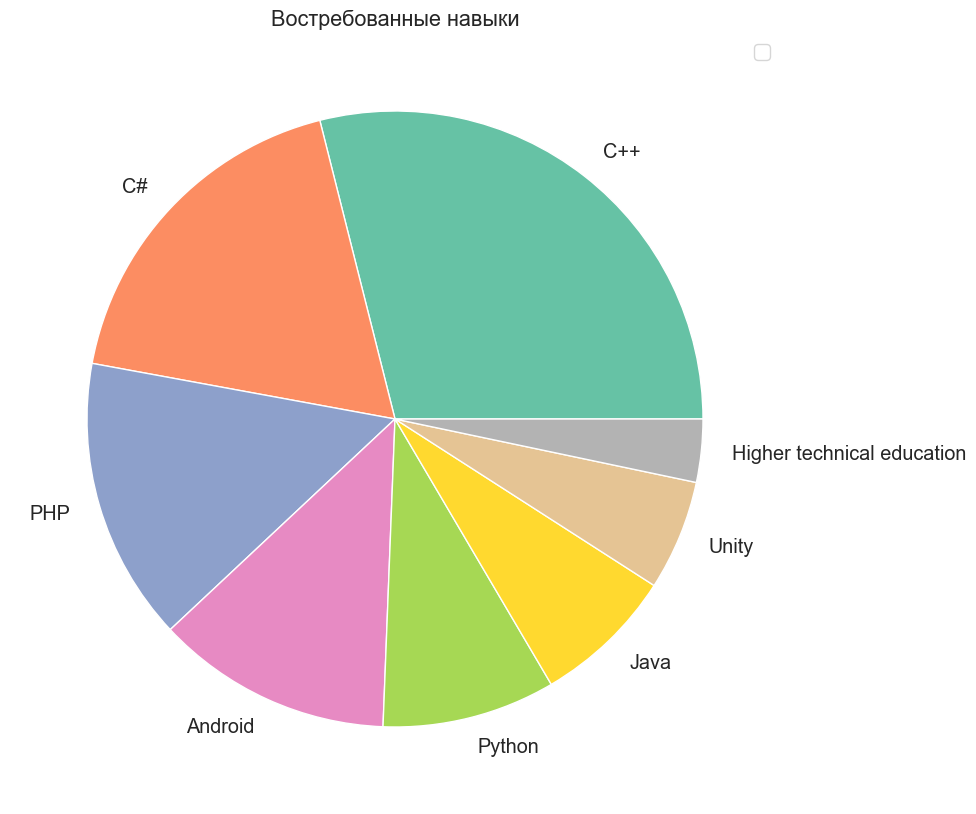

In [741]:
#df.columns
#df['snippet.requirement']
words = pd.DataFrame(" ".join(df['snippet.requirement'].astype(str)).split(' ')).value_counts()
words.rename("quantity").rename_axis('word').reset_index()
# top: C++, C#, Высшее техническое образование, Unity, Java, Python, Android, PHP

requirement = df.dropna(subset=['snippet.requirement'])
cplus = len(requirement[requirement['snippet.requirement'].str.contains('C\+\+')].index)
edu = len(requirement[requirement['snippet.requirement'].str.contains('Высшее техническое образование')].index)
unity = len(requirement[requirement['snippet.requirement'].str.contains('Unity')].index)
java = len(requirement[requirement['snippet.requirement'].str.contains('Java')].index)
python = len(requirement[requirement['snippet.requirement'].str.contains('Python')].index)
android = len(requirement[requirement['snippet.requirement'].str.contains('Android')].index)
php = len(requirement[requirement['snippet.requirement'].str.contains('PHP')].index)
csharp = len(requirement[requirement['snippet.requirement'].str.contains('C\#')].index)
stat = pd.DataFrame({cplus, edu, unity, java, python, android, php, csharp})
stat = stat.rename(index={0: 'C++', 1: 'Higher technical education', 2: 'Unity', 3: 'Java', 4: 'Python', 5: 'Android', 6: 'PHP', 7: 'C#'}, columns={0: 'quantity'})
stat = stat.sort_values(by=['quantity'], ascending=False)

stat.plot.pie(y='quantity', figsize=(10, 10))
plt.title('Востребованные навыки')
plt.ylabel('')
plt.legend('');
plt.show()


С учётом текущего курса построю графики мин.ставки и макс.ставки по зарплатам

Text(0, 0.5, 'количество объявлений')

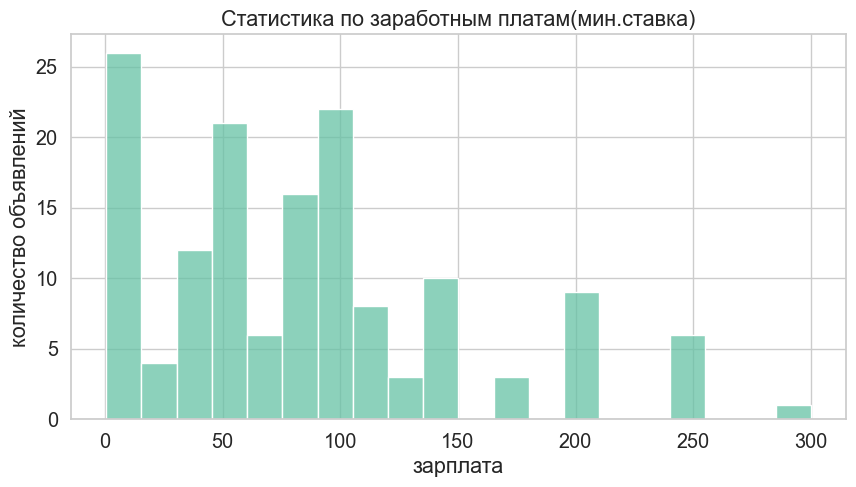

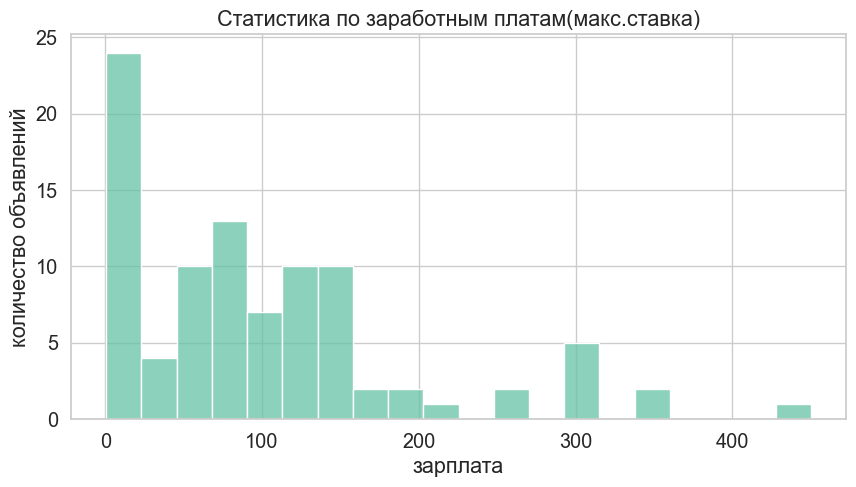

In [742]:
#df.columns
#df['salary.currency'].drop_duplicates()
def exchange(x):
    return x*75.57


df[df['salary.currency'] == 'USD']['salary.from'].apply(exchange)
df[df['salary.currency'] == 'USD']['salary.to'].apply(exchange)

_from = (df['salary.from'].dropna()).astype(float)/1000
_to = (df['salary.to'].dropna()).astype(float)/1000

plt.figure(figsize=(10, 5))
sns.histplot(data=_from, bins=20)
plt.title('Статистика по заработным платам(мин.ставка)')
plt.xlabel('зарплата')
plt.ylabel('количество объявлений')


plt.figure(figsize=(10, 5))
sns.histplot(data=_to, bins=20)
plt.title('Статистика по заработным платам(макс.ставка)')
plt.xlabel('зарплата')
plt.ylabel('количество объявлений');

Не забывайте про выводы.

### <font color="green"><i>Выводы:</i></font>
В Москве быть разработчиком игр невыгодно, а значит, не так и прикольно...
А если серьёзно: анализ вакансий показал все интересующие (лично меня) данные. А именно, из полученных статистик напрямую следует, какие востребованные навыки стоит прокачать для трудоустройства, а также на какую зарплату стоит претендовать/рассчитывать. Все интересующие данные, в том числе информация о графике работы и офисах, можно получить из соответствующих колонок. А, собствено, что ещё душе угодною..?


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [743]:
df['snippet.requirement'] # требуемый опыт. Ниже показано, как можно поискать по ключевым словам:

words = pd.DataFrame(" ".join(df['snippet.requirement'].astype(str)).split(' ')).value_counts()
words.rename("quantity").rename_axis('word').reset_index()

,word,quantity
0,Опыт,413
1,и,325
2,работы,323
3,в,311
4,с,211
...,...,...
3656,NodeJS,1
3657,выручки,1
3658,Node.js.,1
3659,высокая...,1


In [744]:
df['employer.name'] # работодатели
top = df['employer.name'].value_counts()
top.reset_index()
top[0:10] # top 10 популярные

Lesta Games                 26
Playrix                     20
VK                          18
Mobile Games                15
Area of Games               15
Azur Games                  14
CityAds Media               11
Astrum Entertainment         9
Black Star Gaming Lounge     6
Яндекс                       6
Name: employer.name, dtype: int64

In [745]:
number = df['address.street'].value_counts()
number

2-я Звенигородская улица            11
Новодмитровская улица               11
Ленинградский проспект               8
Бутырская улица                      6
Профсоюзная улица                    6
                                    ..
3-й Хорошёвский проезд               1
Шипиловская улица                    1
Таганско-Краснопресненская линия     1
Большой Кисловский переулок          1
улица Москворечье                    1
Name: address.street, Length: 71, dtype: int64

Вместо районов -- улицы. Не хочу возиться с гигантской функцией, относящей к райноу Москвы по улице/станции метро/координатам. Получили некоторую статистику. То же можно провести, например, для ближайших станций метро.

In [746]:
import folium

lat = df['address.lat'].dropna()
lon = df['address.lng'].dropna()
name = df['employer.name'].dropna()

map = folium.Map(location=[55.75, 37.61], zoom_start=11, tiles="CartoDB dark_matter")
# Координаты Москвы в десятичных градусах: (55.75, 37.61)
for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius=5, popup=str(name),
                        fill_color='red', color='red', fill_opacity=0.5,
                        opacity=0.2, icon=folium.Icon(color = 'red')).add_to(map)
map.save("map.html")
map

Тёмная тема карт folium - это прекрасно... Для получения названия компании по точке на карте, нужно навести курсор и нажать. Можно добавить в это описание что-то ещё: достаточно занести интересующие данные о точке в popup=... в парметрах folium.CircleMarker.

Какие выводы можно сделать из построенных графиков?



### <font color="green"><i>Выводы:</i></font>
На карте отлично видно все действующие предложения по Москве. Можно обратиться к списку топовых компаний для расставления приоритетов выбора работодателя.
 Компаний, предлагающих работу в сфере разработки игр (и производных от данной), в Москве не так много. Причём распределены они довольно равномерно, то есть нет такого, что у одной компании десяток офисов на одной улице, а все прочие компании на окраине, что не может не радовать -- полагаю, что нет монополии в Москве в сфере игровой разроботки.